In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop("Serial No.", axis=1, inplace=True)

df.rename(columns={'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)

df['Admitted'] = df['Chance_of_Admit'].apply(lambda x: 1 if x >= 0.75 else 0)

features = df[['GRE Score', 'CGPA']]
target = df['Admitted']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        64
           1       0.74      0.89      0.81        36

    accuracy                           0.85       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.86      0.85      0.85       100



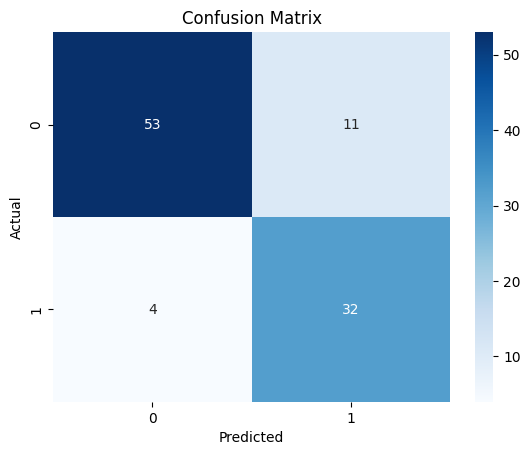

In [6]:
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
